In [1]:
import pandas as pd
import numpy as np

### 실제 관측 데이터

In [2]:
# 데이터 불러오기
Population_raw = pd.read_csv('Population projections.csv')
Population_raw.rename(columns={'Population - Sex: all - Age: all - Variant: estimates':'real', 'Population - Sex: all - Age: all - Variant: medium':'projection'}, inplace=True)
Population = Population_raw.loc[Population_raw['Entity']=='World', ['Year', 'real', 'projection']]

Years = Population['Year'].astype(int).to_list()

LOWER_2020_index = Population.loc[:,'Year'] <= 2019
UPPER_1979_index = Population.loc[:,'Year'] >= 1979

Population = Population.loc[UPPER_1979_index&LOWER_2020_index, ['Year', 'real']]
Population.rename(columns={'Year':'ds', 'real':'Population'}, inplace=True)


Population['ds'] = Population['ds'].astype('str') + ['-01-01' for i in range(len(Population['ds']))]
for y in range(1979,2020):    
    for m in range(1,13):
        if y in Years and m == 1:
            continue

        year = str(y)
        month = str(m)
        day = '01'
        
        new_date = year+'-'+month+'-'+day
        if m < 10:
            new_date = year+'-'+'0'+month+'-'+day
        
        new_row = {'ds': [new_date], 'Population' : [np.NaN]}
        Population = pd.concat([Population, pd.DataFrame(new_row)], axis=0)
    
    # if y%10 == 0:
    #     latest_CO2_emission_index += 1

Population['ds'] = pd.to_datetime(Population['ds'])
Population.sort_values('ds', inplace=True)
Population.set_index('ds', inplace=True)
Population.interpolate(method='time', inplace=True)
Population

,Population
ds,
1979-01-01,4.365583e+09
1979-02-01,4.372244e+09
1979-03-01,4.378260e+09
1979-04-01,4.384921e+09
1979-05-01,4.391367e+09
...,...
2019-08-01,7.764951e+09
2019-09-01,7.764951e+09
2019-10-01,7.764951e+09


### 시나리오 데이터

In [3]:
# 데이터 불러오기
ipcc_scenario = pd.read_csv("ipcc-scenarios.csv")

# 시나리오 및 2020 이상 데이터만
SSP_index = ipcc_scenario.loc[:,"Scenario"] == "SSP2 - Baseline"
UPPER_2020_index = ipcc_scenario.loc[:,"Year"] >= 2020

tmp_POP_scenario = ipcc_scenario.loc[SSP_index & UPPER_2020_index, ['Year','Population']]
tmp_POP_scenario.rename(columns={'Year':'ds'}, inplace=True)
tmp_POP_scenario['ds'] = [str(i) + '-01'+'-01' for i in tmp_POP_scenario['ds'].to_list()]

latest_CO2_emission_index = 0
for y in range(2020,2100):
    
    for m in range(1,13):
        if y%10 == 0 and m == 1:
            continue
        year = str(y)
        month = str(m)
        day = '01'
        
        new_date = year+'-'+month+'-'+day
        if m < 10:
            new_date = year+'-'+'0'+month+'-'+day
        
        new_row = {'ds': [new_date], 'Population' : [np.NaN]}
        tmp_POP_scenario = pd.concat([tmp_POP_scenario, pd.DataFrame(new_row)], axis=0)
    
    if y%10 == 0:
        latest_CO2_emission_index += 1

tmp_POP_scenario['ds'] = pd.to_datetime(tmp_POP_scenario['ds'])
tmp_POP_scenario.sort_values('ds', inplace=True)
tmp_POP_scenario.set_index('ds', inplace=True, drop=True)
tmp_POP_scenario.interpolate(method='time', inplace=True)
tmp_POP_scenario

,Population
ds,
2020-01-01,7.611250e+09
2020-02-01,7.616772e+09
2020-03-01,7.621938e+09
2020-04-01,7.627461e+09
2020-05-01,7.632805e+09
...,...
2099-09-01,9.039821e+09
2099-10-01,9.038001e+09
2099-11-01,9.036120e+09


,Population
ds,
1979-01-01,4.365583e+09
1979-02-01,4.372244e+09
1979-03-01,4.378260e+09
1979-04-01,4.384921e+09
1979-05-01,4.391367e+09
...,...
2099-09-01,9.039821e+09
2099-10-01,9.038001e+09
2099-11-01,9.036120e+09


<Axes: xlabel='ds'>

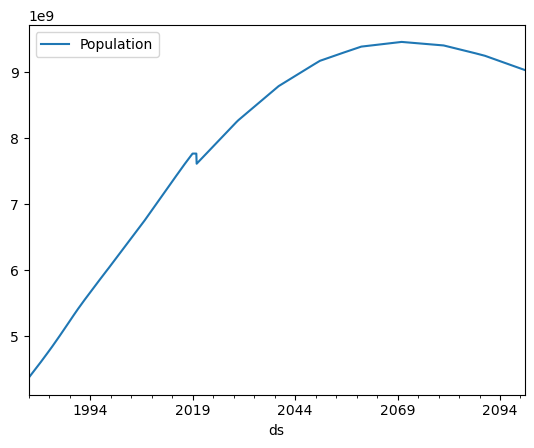

In [4]:
total = pd.concat([Population,tmp_POP_scenario], axis=0)
total.to_csv('SSP2_POP_data.csv')

display(total)
total.plot()